# DS-SF-25 | Codealong 06 | Introduction to Regression and Model Fit

In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
def read_dataset():
    return pd.read_csv(os.path.join('..', 'datasets', 'zillow-06.csv'), index_col = 'ID')

df = read_dataset()

In [ ]:
# TODO

## Part A1 - Simple Linear Regression

### Transforming Variables, e.g., scaling

> #### Activity | How to scale SalePrice from \$ to \$M, Size and LotSize from sqft to "1,000 sqft"?

In [3]:
def scale_variables(df):
    # >>>
    df.SalePrice = df.SalePrice / (10 ** 6) # Sale price in $M
    df.Size = df.Size / (10 ** 3) # Size in 1,000 sqft
    df.LotSize = df.LotSize / (10 ** 3) # Lot size in 1,000 sqft
    # ===
    # TODO: Sale price in $M
    # TODO: Size in 1,000 sqft
    # TODO: Lot size in 1,000 sqft
    # <<<

scale_variables(df)

In [4]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


### `SalePrice` as a function of `Size`

In [22]:
def Xy(df):
    # >>>
    X = df[ ['Size'] ] # X is a DataFrame

    y = df.SalePrice # y is a Series
    # ===
    # TODO
    # <<<

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 01 Aug 2016   Prob (F-statistic):                nan
Time:                        20:28:05   Log-Likelihood:                    nan
No. Observations:                 933   AIC:                               nan
Df Residuals:                     933   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size              nan        nan        nan        nan           nan       nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                  nan
Skew:                             nan   Prob(JB):                          nan
Kurtosis:                         nan   Cond. No.                          nan
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` - Take 2

In [23]:
def Xy(df):
    # >>>
    df = df.dropna(subset = ['Size', 'SalePrice'])
    X = df[ ['Size'] ] # X is a DataFrame

    y = df.SalePrice # y is a Series
    # ===
    # TODO: X
    # TODO: y
    # <<<

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3521.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          1.14e-313
Time:                        20:28:05   Log-Likelihood:                -756.65
No. Observations:                 903   AIC:                             1515.
Df Residuals:                     902   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.6415      0.011     59.338      0.000         0.620     0.663
==============================================================================
Omnibus:                      313.361   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1658.450
Skew:                          -1.497   Prob(JB):                         0.00
Kurtosis:                       8.926   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predictions

In [24]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})

In [25]:
predict_X

,Size
0,1.2
1,1.4
2,1.6


In [26]:
predict_y = model.predict(predict_X)

In [27]:
predict_y

array([ 0.76983245,  0.89813785,  1.02644326])

In [28]:
type(predict_y)

numpy.ndarray

### `SalePrice` as a function of `Size` - Take 3

In [29]:
def Xy(df):
    # >>>
    df = df.dropna(subset = ['Size', 'SalePrice'])
    X = df[ ['Size'] ] # X is a DataFrame
    X = sm.add_constant(X)

    y = df.SalePrice # y is a Series
    # ===
    # TODO: X
    # TODO: y
    # <<<

    return X, y

X, y = Xy(df)

model = smf.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     225.0
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           1.41e-45
Time:                        20:28:07   Log-Likelihood:                -560.34
No. Observations:                 903   AIC:                             1125.
Df Residuals:                     901   BIC:                             1134.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.7082      0.032     22.152      0.000         0.645     0.771
Size           0.2784      0.019     15.002      0.000         0.242     0.315
==============================================================================
Omnibus:                       24.647   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.865
Skew:                           0.054   Prob(JB):                     2.01e-12
Kurtosis:                       4.192   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Making predicitions (cont.)

In [30]:
predict_X = pd.DataFrame({'Size': [1.2, 1.4, 1.6]})
predict_X = sm.add_constant(predict_X)

In [31]:
predict_X

,const,Size
0,1,1.2
1,1,1.4
2,1,1.6


In [32]:
predict_y = model.predict(predict_X)

In [33]:
predict_y

array([ 1.04230444,  1.09798766,  1.15367088])

### Model's parameters

In [34]:
# TODO

In [35]:
# TODO

In [36]:
# TODO

### t-values

In [37]:
model.tvalues

const    22.152243
Size     15.001555
dtype: float64

### p-values

In [38]:
# TODO

### Confidence Intervals

In [39]:
# TODO

In [40]:
# TODO

In [41]:
# TODO

In [42]:
# TODO

## Part A2 - Simple Linear Regression (cont.)

#### Alternatively | Using a "formula"

In [43]:
# TODO

model=smf.ols(formula="SalePrice~0+Size",data=df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3521.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          1.14e-313
Time:                        20:28:15   Log-Likelihood:                -756.65
No. Observations:                 903   AIC:                             1515.
Df Residuals:                     902   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.6415      0.011     59.338      0.000         0.620     0.663
==============================================================================
Omnibus:                      313.361   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1658.450
Skew:                          -1.497   Prob(JB):                         0.00
Kurtosis:                       8.926   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalePrice` as a function of `Size` without `Intercept`

In [44]:
# TODO

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     3521.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          1.14e-313
Time:                        20:28:16   Log-Likelihood:                -756.65
No. Observations:                 903   AIC:                             1515.
Df Residuals:                     902   BIC:                             1520.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.6415      0.011     59.338      0.000         0.620     0.663
==============================================================================
Omnibus:                      313.361   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1658.450
Skew:                          -1.497   Prob(JB):                         0.00
Kurtosis:                       8.926   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Drop outliers

In [45]:
def drop_outliers(df):
    print 'Dropping outliers'
    print '- n (before) =', df.shape[0]

    # >>>
    Q1 = df.SalePrice.quantile(.25)
    Q2 = df.SalePrice.quantile(.5)
    Q3 = df.SalePrice.quantile(.75)
    IQR = Q3 - Q1
    # TODO
    # <<<
    print '- Q1         =', Q1, '($M)'
    print '- Q2/Median  =', Q2, '($M)'
    print '- Q3         =', Q3, '($M)'

    # >>>
    df.drop(df[(df.SalePrice < Q1 - 1.5 * IQR) | (df.SalePrice > Q3 + 1.5 * IQR)].index, inplace = True)
    # TODO
    # <<<

    print '- n (after)  =', df.shape[0]

drop_outliers(df)

Dropping outliers
- n (before) = 933
- Q1         = 0.788 ($M)
- Q2/Median  = 1.05 ($M)
- Q3         = 1.43 ($M)
- n (after)  = 915


### `SalePrice` as a function of `Size` (again)

In [46]:
# TODO
model2=smf.ols(formula="SalePrice~0+Size",data=df).fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3431.
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          1.36e-306
Time:                        20:28:18   Log-Likelihood:                -715.13
No. Observations:                 885   AIC:                             1432.
Df Residuals:                     884   BIC:                             1437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Size           0.6282      0.011     58.577      0.000         0.607     0.649
==============================================================================
Omnibus:                      333.336   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1832.376
Skew:                          -1.629   Prob(JB):                         0.00
Kurtosis:                       9.251   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part B - How is a linear regression model fitted?

In [51]:
# TODO
np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)

array([ 0.70820512,  0.2784161 ])

## Part C - How to check modeling assumptions?

### `.plot_regress_exog()`

LinAlgError: Arrays cannot be empty

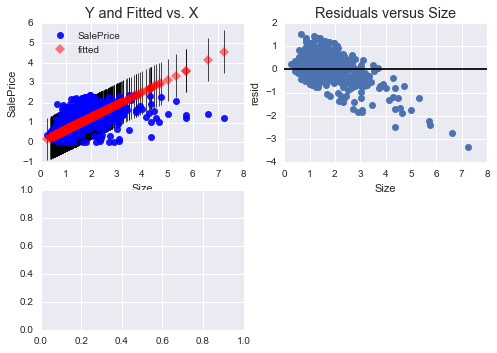

In [55]:
sm.graphics.plot_regress_exog(model2,'Size')
pass

## Part D1 - How to check normality assumption?

### Histogram of residuals

In [57]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.resid

ID
15063471     -0.153590
15063505      1.064512
15064044      0.507810
15064257     -0.082456
15064295     -0.045382
                ...   
2124214951   -0.401473
2126960082   -0.039144
2128308939   -0.333153
2131957929   -0.154164
2136213970   -0.126845
dtype: float64

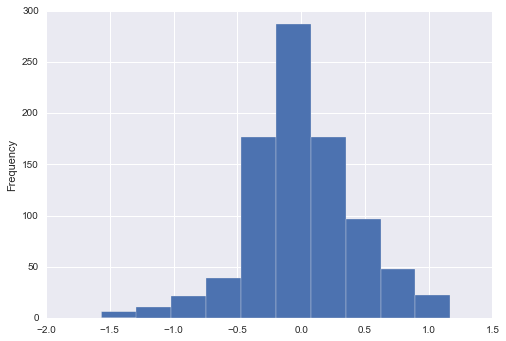

In [58]:
model.resid.plot(kind='hist')

### q-q plot of residuals against a normal distribution

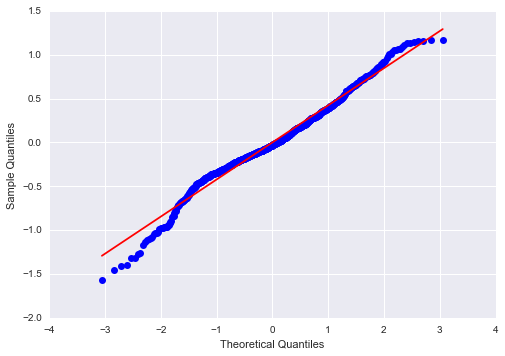

In [61]:
sm.qqplot(model.resid,line='s')
pass

> `line = 's'` shows a standardized line in which the expected order statistics are scaled by the standard deviation of the given sample and have the mean added to them

## Part D2 - How to check normality assumption?

### q-q plot of two normal distributions

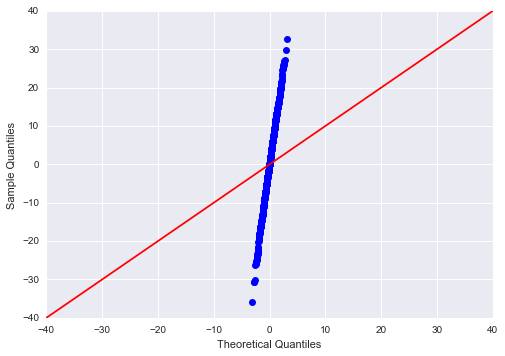

In [72]:
normal_array = np.random.normal(0,10,size=1000)

sm.qqplot(normal_array,line='45')

pass

In [ ]:
# TODO

In [ ]:
# TODO

## Part E - Inference and Fit

In [81]:
df=read_dataset()
scale_variables(df)

### Effect of outliers on regression modeling - `SalePrice` as a function of `Size`

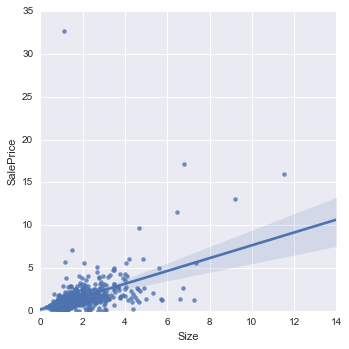

In [82]:
sns.lmplot('Size','SalePrice',df).set(xlim=(0,None),ylim=(0,None))

### `SalePrice` as a function of `Size` after dropping the outliers

Dropping outliers
- n (before) = 933
- Q1         = 0.788 ($M)
- Q2/Median  = 1.05 ($M)
- Q3         = 1.43 ($M)
- n (after)  = 915


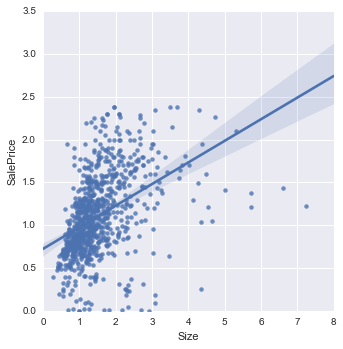

In [84]:
# TODO: drop outliers
drop_outliers(df)

# TODO: plot again using seaborn
sns.lmplot('Size','SalePrice',df).set(xlim=(0,None),ylim=(0,None))

## Part F - $R^2$

In [87]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # rescale the variables (use the function defined above)

### `SalePrice` as a function of `Size`

In [ ]:
model = smf.ols(formula = 'SalePrice ~ Size', data = df).fit()

model.summary()

### $R^2$

In [85]:
model.rsquared

0.18455621797145527

### Effects of outliers on $R^2$

In [88]:
print 'With outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

print
drop_outliers(df) # drop outliers
print

print 'Without outliers:'
print '- SalePrice ~     Size; R^2 =', smf.ols(formula = 'SalePrice ~ Size', data = df).fit().rsquared
print '- SalePrice ~ 0 + Size; R^2 =', smf.ols(formula = 'SalePrice ~ 0 + Size', data = df).fit().rsquared

With outliers:
- SalePrice ~     Size; R^2 = 0.2355931716
- SalePrice ~ 0 + Size; R^2 = 0.565060681491

Dropping outliers
- n (before) = 1000
- Q1         = 0.8 ($M)
- Q2/Median  = 1.1 ($M)
- Q3         = 1.5325 ($M)
- n (after)  = 933

Without outliers:
- SalePrice ~     Size; R^2 = 0.199855535471
- SalePrice ~ 0 + Size; R^2 = 0.796063918194


## Part G - Multiple Linear Regression

In [89]:
df = read_dataset() # reload the dataset to get our outliers back...

scale_variables(df) # scaling variables (function defined above)

### `SalePrice` as a function of `Size` and `BedCount`

In [96]:
# TODO

model=smf.ols(data=df,formula='SalePrice~Size+BedCount').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     506.9
Date:                Mon, 01 Aug 2016   Prob (F-statistic):          8.01e-144
Time:                        21:08:53   Log-Likelihood:                -1026.2
No. Observations:                 819   AIC:                             2058.
Df Residuals:                     816   BIC:                             2073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.1968      0.068      2.883      0.004         0.063     0.331
Size           1.2470      0.045     27.531      0.000         1.158     1.336
BedCount      -0.3022      0.034     -8.839      0.000        -0.369    -0.235
==============================================================================
Omnibus:                      626.095   Durbin-Watson:                   1.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34896.976
Skew:                           2.908   Prob(JB):                         0.00
Kurtosis:                      34.445   Cond. No.                         8.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
corr = df.corr()

corr



,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258
BedCount,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700
BathCount,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000


## Part H - Multicollinearity

### Transforming Variables (cont.)

> #### Activity | Create new variables `SizeLog` and `LotSizeLog` that represent the log of `Size` and `LotSize`.  Repeat using square root, cube root, square, and cube

In [100]:
df[['SizeLog','LotSizeLog']]=df[['Size','LotSize']].apply(np.log10)

In [102]:

model=smf.ols(data=df,formula='SalePrice~SizeLog+BedCount+LotSizeLog').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     76.28
Date:                Mon, 01 Aug 2016   Prob (F-statistic):           1.36e-39
Time:                        21:14:17   Log-Likelihood:                -737.78
No. Observations:                 435   AIC:                             1484.
Df Residuals:                     431   BIC:                             1500.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2225      0.248      0.898      0.370        -0.264     0.709
SizeLog        4.8617      0.460     10.560      0.000         3.957     5.767
BedCount      -0.1358      0.071     -1.914      0.056        -0.275     0.004
LotSizeLog     1.4883      0.424      3.512      0.000         0.655     2.321
==============================================================================
Omnibus:                      433.942   Durbin-Watson:                   1.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19404.868
Skew:                           4.295   Prob(JB):                         0.00
Kurtosis:                      34.573   Cond. No.                         29.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Multicollinearity

> #### Activity | Show the correlation between the different engineered features of  `Size`

In [103]:
df[ ['Size', 'SizeLog', 'SizeSqrt', 'SizeCbrt', 'SizeSquare', 'SizeCube'] ].corr()

KeyError: "['SizeSqrt' 'SizeCbrt' 'SizeSquare' 'SizeCube'] not in index"

#### `SalePrice` as a function of `Size` and its other engineered features

In [ ]:
# TODO

> #### Activity | What happened?

## Part I - Adjusted $R^2$

In [ ]:
formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize'

model = smf.ols(formula = formula, data = df).fit()

print 'R^2 =', model.rsquared, '(original model)'

Let's now add some artificial noise.

In [ ]:
x_df = pd.DataFrame(index = df.index)

for i in range(100):
    x = 'X{}'.format(i)
    x_df[x] = np.random.random(df.shape[0])

formula = 'SalePrice ~ 0 + IsAStudio + BedCount + BathCount + Size + LotSize + BuiltInYear + '
formula += ' + '.join(x_df.columns.values)

In [ ]:
formula

In [ ]:
x_df = x_df.join(df)

x_model = smf.ols(formula = formula, data = x_df).fit()

In [ ]:
print 'Model with artificial noise:'
print '-          R^2 =', x_model.rsquared
print '- Adjusted R^2 =', x_model.rsquared_adj